We learned how to repeat operations on multiple elements of a data frame or list using for-loops.

When working with R, though, We won't write for-loops as often as we would if we were using other programming languages. In R, many built-in functions `contain for-loops`. This makes it possible to call a function instead of directly using a for-loop.

Many R functions are **vectorized**, meaning we can use them to operate on all elements of a vector quickly. We've seen some of them, including `mean()`, `min()`, `max()`, and `sum()`, in action already.

In this file, we'll delve deeper into some of R's vectorized functions, why they will help us write fast and efficient code, and explain why and when we should use them. We'll also show how to use the pipe operator (`%>%`) to write efficient code by chaining functions together.

We'll continue exploring FiveThirtyEight's [data](https://www.kaggle.com/fivethirtyeight/world-cup) on the [2014 FIFA World Cup](https://en.wikipedia.org/wiki/2014_FIFA_World_Cup). We'll learn how to use vectorized functions to perform common data manipulation and analysis tasks, including summarizing match results and identifying the top-scoring matches.

`library(readr)
scores <- read_csv("scores.csv")`

R is a [high-level](https://en.wikipedia.org/wiki/High-level_programming_language), [interpreted](https://en.wikipedia.org/wiki/Interpreted_language) programming language. This means that, in contrast to low-level, compiled languages, R performs many basic computer tasks "behind the scenes." For example, if we create the following vector:

`vector <- c(1, 3, 5, 6, 7, 9, 11)`

R will:

* "Guess" that the vector elements are numeric
* Find space in memory for the vector
* Assign `vector` as the name that directs R to the stored values of the vector

Most R functions are written in a compiled language (like Fortran or C) and have an R "wrapper" that users interact with.

If we apply a function to each element of the vector repeatedly, R has to interpret the input of the function and pass it to the compiled code for each element. However, if we apply the function to the entire vector, R only needs to interpret the input and pass it to the compiled code once:

Consider the following example. Let's calculate the sum of all the numbers from zero to 100,000,000 using non-vectorized and vectorized methods and compare the amount of time it takes the R interpreter to run the code for each.

We will measure the running time of the code using the function [system.time()](https://stat.ethz.ch/R-manual/R-devel/library/base/html/system.time.html), which outputs the time elapsed (in seconds) while the function is executed.

We can calculate the sum of all the numbers from zero to 100,000,000 using a non-vectorized solution (a for-loop):

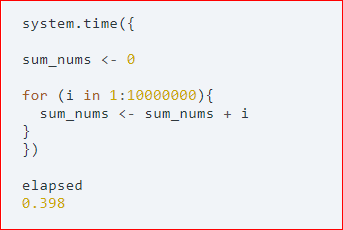

Or we could perform the calculation using the built-in R function `sum()`.

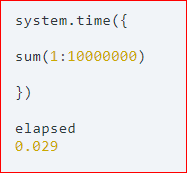

As we can see from the results of the runtime analysis, using the `sum()` function is substantially faster than using the for-loop.

While using for-loops isn’t necessarily a bad choice, using vectorized functions is often faster and can make code easier to read and understand.

Let's look at a vectorized function for applying if-else statements. The `if_else()` function is part of the `dplyr` package and requires the following input:

* A vector or multiple vectors
* A condition
* An action to perform if the condition is true
* An action to perform if the condition is false

We could replace the for-loop with the `if_else()` function.

We would write:

`if_else(scores$home_goals > scores$away_goals, "home team won", "home team did not win")
if_else(scores$home_goals > scores$away_goals, "home team won", "home team did not win")`

**Task**

* Using `if_else()`, write an expression to return **"tie"** if `scores$home_goals` is equal to `scores$away_goals` and **"did not tie"** if home and away goals are not equal.

**Answer**

`tied_matches <- if_else(scores$home_goals == scores$away_goals, "tie", "did not tie")`

We learned to chain multiple conditional statements to specify actions to be taken depending on more than two possible outcomes.

Let's say we wanted to print a classification for each number between one and 1,000:

* Less than 100: "small"
* Between 100 and 500: "medium"
* Greater than 500: "large"

We could write a for-loop to apply the conditional statements to each value in the numeric vector 1:1000

`for (i in 1:1000) {  
  if (i <= 100) {
    print("small")
  } else if (i > 100 & i <= 500) {
    print("medium")
  } else if (i > 500) {
    print("large")
  }
}`

Alternatively, we can take a vectorized approach by nesting `if_else()` functions.

We would write the following code:

`if_else(1:1000 < 100, "small", 
  if_else(1:1000 > 100 & 1:1000 <= 500, "medium",
    if_else(1:1000 > 500, "large", "")))`


Remember the `if_else()` function requires us to provide it with a vector, a condition, an action to perform if the condition is true, and an action to perform if the condition is false.

When nesting `if_else()` functions, we specify a different `if_else()` function to perform as the action to take if the first condition is not met:

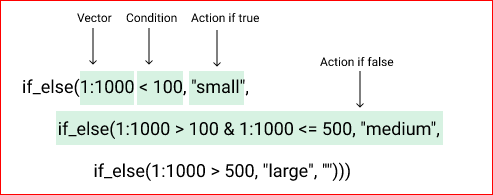

For each `if_else()` function in the chain, if the condition is not met, the interpreter moves on to the next `if_else()` function:

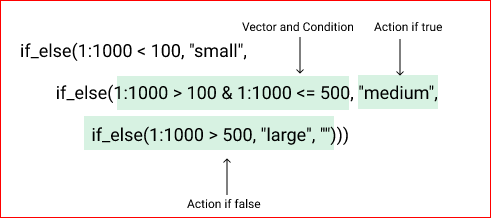

Each `if_else()` function requires us to specify two actions to take (based on whether the condition is true or false). Note that since we were only using three classifications, we used an empty pair of quotes (`""`) as the second action in the last `if_else()` function.

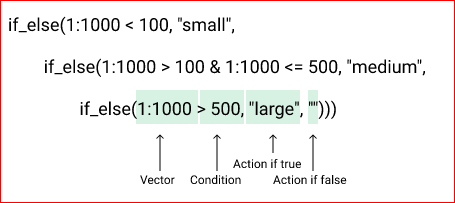

Outside a loop, output will print automatically, so we did not need to explicitly use `print()` in the code above.

In the previous file, we wrote the following code to create a vector, `home_team_result`, conaining the results of each match

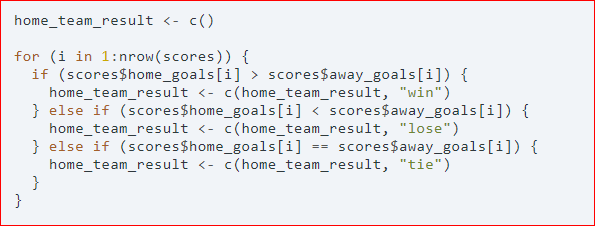

Now, let's instead use nested `if_else()` functions to create the `home_team_result` vector.

**Task**

* Using nested `if_else()` statements, create a vector named home_team_result containing the following:

 1. "win" if home_goals > away_goals
 2. "lose" if home_goals < away_goals
 3. "tie" if home_goals == away_goals
 
* Use the mutate() function to add home_team_result as a new column (also called home_team_result) to the scores data frame.

**Answer**

`home_team_result <- if_else(scores$home_goals > scores$away_goals,"win", if_else(scores$home_goals < scores$away_goals, "lose", if_else(scores$home_goals == scores$away_goals,"tie","")))`

`scores_2 <- scores %>% mutate(home_team_result = home_team_result)`

In the last file, we investigated the 2014 World Cup data to see whether home teams appeared to have an advantage. We created a new variable, home_team_result, that contained "win", "lose", or "tie" for each match. We then used a for-loop to add up the number of home team wins, losses, and ties to get a total for each match outcome:

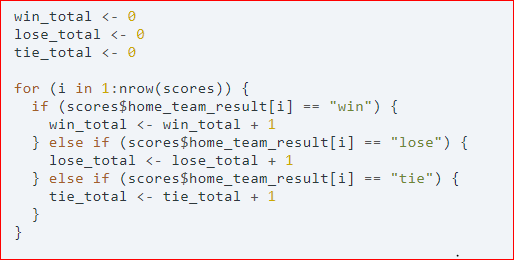

Let's explore vectorized functions as an alternative to the for-loop we wrote for adding up the number of matches in the "win", "lose", and "tie" categories of `home_team_result`.

We could use `sum()`, which we have learned is a vectorized built-in R function, to calculate the number of instances of "win", "lose", and "tie" in the `home_team_result` column of `scores`:

`sum(scores$home_team_result == "win")
sum(scores$home_team_result == "lose")
sum(scores$home_team_result == "tie")`

While this approach certainly is more efficient than the for-loop example above, it still leaves us writing out very similar lines of code several times. Remember: If we're copying and pasting code, it's probably time to seek a better solution.

Before we present solutions for the problem at hand, let's dive deeper into what we actually want to accomplish.

Here's a subset of the `scores_2` data frame that we just created, with the new column, home_team_result, that we added. Home team wins and losses are highlighted in different colors.

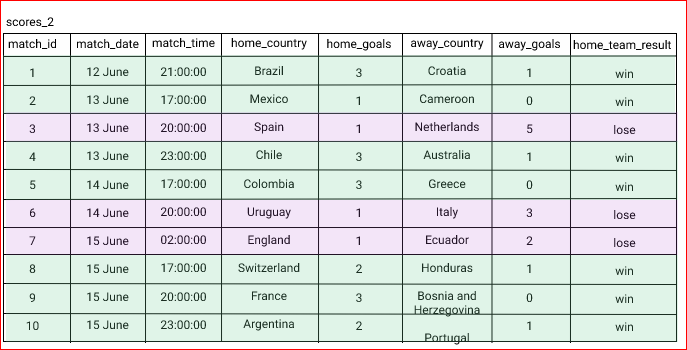

To calculate the total home team wins and losses, we need to split the data into two groups

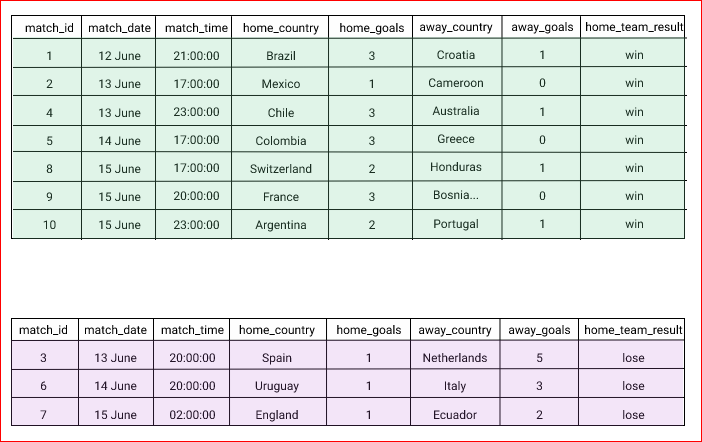

Then, we can apply the `n()` function, to count the number of rows in each group

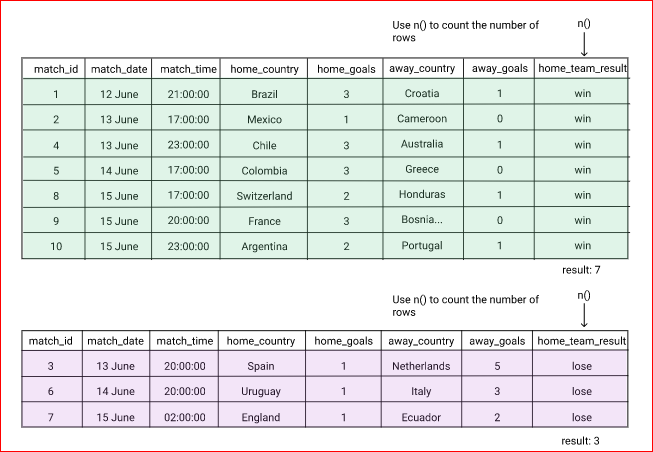

This type of problem is known as a [split-apply-combine](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.182.5667&rep=rep1&type=pdf) problem in R — the data is split into groups, a function is performed on each group, and the results are summarized.

There are two functions in the `dplyr` package that are useful for working on split-apply-combine problems:

* `group_by()` lets us group a data frame based on a variable, such as `home_team_result`.
* `summarize()` lets us apply a function, like `n()` or `sum()`, to each group.


For working with functions from tidyverse packages, we can use the pipe operator (`%>%`)

`scores %>% group_by(home_team_result)`

The code above splits rows of scores into the following three groups:

* win
* lose
* tie

When we print the first few rows of a grouped data frame, we'll see the grouping variable and the number of groups specified:

`A tibble: 59 x 13
Groups:   home_team_result [3]`


Once the data frame is grouped, we can perform operations on each group using the `summarize()` function.

To calculate the number of instances of each outcome in the `home_team_result` column, we can use `n()`, which counts the number of data frame rows in each group. The `n()` function is specific to `dplyr`, and can only be used within `dplyr` functions.

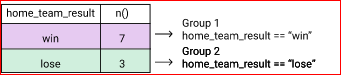

Let's assign the counts of rows in each group to the column header total:

`scores %>% 
  group_by(home_team_result) %>% 
  summarize(total = n())`
  
The result is a data frame (a tibble, remember, since the original data frame was imported using `readr`) containing the total number of matches in each category of `home_team_result`:

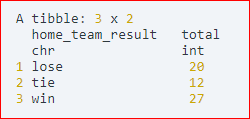

To quantify the number of matches that home teams won, lost, or tied, we just needed to count the number of rows in each group. We can also use `summarize()` to calculate summaries for specific variables, though.

For example, let's calculate the average number of goals scored by home teams during matches they won, lost, and tied.

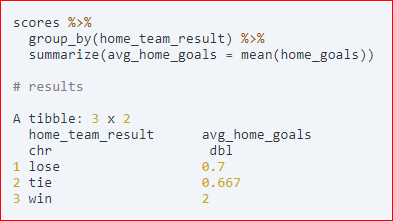

When we're done working with our grouped data frame, we should return it to its previous state by ungrouping it:

`scores %>% ungroup()`

**Task**

There are a number of teams that played in multiple matches in the 2014 World Cup. Let's group the data frame by home_country and calculate the total number of goals scored by each home country during the 2014 World Cup.

**Answer**

`home_goals_sum <- scores %>%
    group_by(home_country) %>%
    summarize(sum(home_goals))`

We've now learned to group a data frame by one variable and perform operations on each group.

However, what if we want to group our data frame by multiple variables? For example, maybe we want to calculate the total number of wins, losses, and ties for each home country (there are 30 home countries that played in the 2014 World Cup) in the `scores` data frame.

To perform this calculation, we would first group the data frame by `home_country` and `home_team_results`:

`scores %>%
    group_by(home_country, home_team_result)`

This operation results in the `scores` data frame being separated into 30 groups — one for each home country.

We can then summarize the grouped `scores` data frame using `n()` to count the number of rows within each group.

`scores %>%
    group_by(home_country, home_team_result) %>%
    summarize(total = n())`

The resulting data frame contains the number of wins, losses, and ties for each home country that played in the 2014 World Cup:

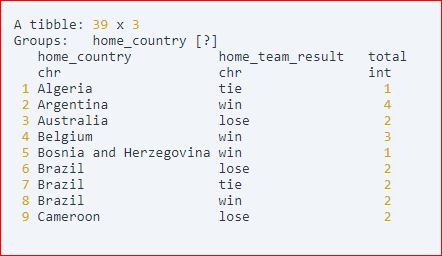

It is possible to group a data frame by as many variables as is necessary for our analysis. Variable columns are arranged in the output data frame in the order that they are listed in `group_by()`.

We can also specify multiple operations within the `summarize()` function at once. For example, if we wanted to calculate the minimum, maximum, and average number of goals scored by each home country, we could write the following:

`scores %>%
    group_by(home_country) %>%
    summarize(min = min(home_goals), 
              max = max(home_goals), 
              avg = mean(home_goals))`

**Task**

* Use the `group_by()` and `summarize()` functions on the `scores` data frame to write an expression that returns a data frame containing the total (sum), average, minimum, and maximum away goals for each away country. Name the summary variables `total`, `average`, `min`, and `max`.

**Answer**

`away_results <- scores %>% 
    group_by(away_country) %>%
    summarize(total = sum(away_goals), 
              average = mean(away_goals), 
              min = min(away_goals), 
              max = max(away_goals))`

Here, we'll discuss the pipe operator in greater depth, and show how to use it to maximize the efficiency and clarity of our code when working with R functions.

We've discussed the fact that often, our R code will consist of a series of operations performed using functions rather than control structures like for-loops. The point of the pipe is to help R users write code that chains functions together in a way that is easy to read and write.

The pipe originated with a package called` maggritR`. The tidyverse has adopted the pipe as a key feature of its packages, so loading tidyverse packages loads `%>%` automatically.

To understand how the pipe can help us make the best use of R when performing a series of operations, let's look at an example.

Let's say we wanted to analyze the scores data frame to figure out which home countries played in matches with the greatest number of total goals (`away` + `home`) scored. We are now familiar with dplyr functions for performing these data frame manipulations. Let's first perform them without using `%>%`.

First, we'd use `mutate()` to add a total_goals column to scores and save the result as a new data frame, `scores_total`:

`scores_total <- mutate(scores, total_goals = home_goals + away_goals)`

Then, we'd group `scores_total` by `home_country` and save the result as a new data frame, `scores_group`:

`scores_group <- group_by(scores_total, home_country)`

Once we've grouped the data, now we can use `summarize()` to calculate the `sum (total)` of the total goals scored in matches each home country played in. We'd save the output as a new variable, `scores_summary`.

`scores_summary <- summarize(scores_group, total = sum(total_goals))`

Finally, to see which countries played in matches with the greatest number of goals scored, we could use the `arrange()` function to order scores_summary in descending order by total (calculated in the last step):

`arrange(scores_summary, desc(total))`

Writing the code this way accomplishes our goal of seeing which home countries played in matches with the greatest number of total goals:

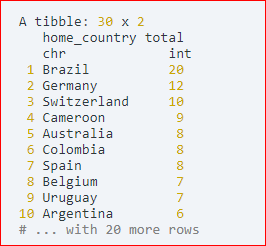

However, we had to keep track of several intermediate objects scored as new variables (`scores_total`, `scores_group`, `scores_summary`) and they ended up cluttering the global environment. Here's a screenshot of the global environment window in RStudio after working through the exercise above:

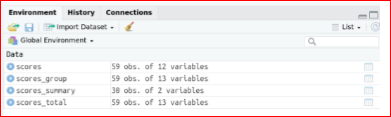

While we had the option of overwriting `scores` with each new step, we may want to keep the original scores data frame in our environment. Overwriting `scores` each time would also make our code less clear, since it would be difficult to see what we're changing with each new line of code.

Using the pipe, however, allows us to write code that focuses on what we're doing in each step because we don't need to worry about creating intermediate objects or overwriting your original object:

`scores %>%
  mutate(total_goals = sum(home_goals, away_goals)) %>%
  group_by(home_country) %>%
  summarise(total = sum(total_goals)) %>%
  arrange(desc(total))`

So how does it work? Basically, `%>%` allows us to write code so that the output of a function is passed to the next function from left to right. We discussed earlier that most R functions do a lot of computing work for us behind the scenes, and we as a user interact with a "wrapper". The pipe is a good example of this. The `magrittR` package reorganizes code we write to overwrite an intermediate object.

Why not use the pipe operator for all our code? As we learn to use other packages in the tidyverse for data analysis work, we often will be able to write efficient code using `%>%`. However, there are some situations where we shouldn't rely on the pipe:

* If we are writing very long chains of functions (more than ten or so steps), it makes sense to have an intermediate variable. This will help us if something goes awry and we need to figure out what's wrong.

* Pipes work best for performing linear sequences of operations on single objects. If we're working with multiple objects or complex dependency structures (situations we'll encounter later on), the pipe isn't the tool for the job.

**Task**

* Create a new data frame, `brazil_goals`, by performing the following operations:

 * Filter the `scores` data frame to retain only data on matches in which Brazil played (either as the home or the away team. Use the **`|`** operator to specify).
 * Add a new column, `total_goals`, containing the total goals scored in each match (`home_goals` + `away_goals`).
 * Arrange the data frame by `total_goals` so that the matches with the largest number of `total goals` is at the top of the data frame.
* Chain the functions you use together using the `%>%` operator to avoid creating intermediate objects.

**Answer**

`brazil_goals <- scores %>%
  filter(home_country == "Brazil" | away_country == "Brazil") %>%
  mutate(total_goals = home_goals + away_goals) %>%
  arrange(desc(total_goals))`

In this file, we learned to use vectorized functions as alternatives to the control structures we learned about earlier in the course, and about why vectorization allows us to make the best use of R's functionality.

We're now able to use R to perform a number of common and important data analysis tasks that we'll use frequently:

* Writing vectorized if-else expressions
* Splitting data, applying functions to each group, and summarizing the results
* Writing simplified code by chaining our functions together using the pipe operator

It's okay if we write code with a mix of vectorized and non-vectorized approaches. We encourage to use whatever approach we feel most comfortable with to solve our problem, and then go back and think about how solution might be improved using techniques like vectorization or pipes.